In [213]:
import numpy as np
import streamlit as st
import matplotlib.pyplot as plt
from datetime import datetime as dt
import pymysql
import pandas as pd
import subprocess
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from dateutil import parser
from datetime import datetime

db = pymysql.connect(host='119.67.109.156', 
                        port=3306,
                        user='root', 
                        password='Korea2022!', 
                        db='project_wd', 
                        charset='utf8')






In [206]:
def shade_zero_data(ax, data_df, data):
    is_zero = data_df == 0
    zero_dates = data[is_zero]['date'].tolist()
    
    if not zero_dates:
        return
    
    start = zero_dates[0]
    for current_date, next_date in zip(zero_dates, zero_dates[1:] + [None]):
        if next_date and (next_date - current_date).days == 1:  # If they are consecutive
            continue
        else:
            ax.axvspan(start, current_date, color='grey', alpha=0.5)
            if next_date:
                start = next_date



def shade_negative_one_data(ax, data_df, data):
    is_negative_one = data_df == -1
    negative_one_dates = data[is_negative_one]['date'].tolist()
    
    if not negative_one_dates:
        return
    
    start = negative_one_dates[0]
    for current_date, next_date in zip(negative_one_dates, negative_one_dates[1:] + [None]):
        if next_date and (next_date - current_date).days == 1:  # If they are consecutive
            continue
        else:
            ax.axvspan(start, current_date, color='grey', alpha=0.5)
            if next_date:
                start = next_date

def convert_date(date_str):
    if not isinstance(date_str, str):
        return date_str
    try:
        # First, try parsing with ISO format
        return pd.to_datetime(date_str, format='%Y-%m-%d', errors='raise').strftime('%Y-%m-%d')
    except:
        # If the above fails, try parsing with %m/%d/%Y format
        return pd.to_datetime(date_str, format='%m/%d/%Y', errors='raise').strftime('%Y-%m-%d')


In [207]:
def extract_range_data(uid_table, uid, smcfb_info):

    df = uid_table
    # df = uid_table deep copy를 생성하여 원본 데이터에 영향을 주지 않습니다.
    df = uid_table.copy()

    # 날짜 변환 전에 date 열의 고유한 값들을 확인합니다.
    unique_dates = df['date'].unique()
    # Convert the 'date' column values to datetime objects    
    # Now format the datetime values to the desired string format
    df['date'] = df['date'].apply(convert_date)
    df['date'] = pd.to_datetime(df['date'])
    df = df.drop_duplicates(subset='date', keep='first')
    
    
    min_date = df['date'].min()
    max_date = df['date'].max()

    print(min_date)
    print(max_date)

    return df, min_date, max_date




# Test the function
# extract_range_data(["file1.csv", "file2.csv", ...], "sample_uid", [start_date, end_date])


In [208]:
def plot_resting(df, min_date, max_date):
    fig, ax = plt.subplots(figsize=(12, 6))
    axes = [ax] 

    data_sorted = df.sort_values(by='date')

    time = data_sorted['date']
    sample = data_sorted['resting_hr'] 


    axes[0].plot(time, sample, '-o', label="resting_hr", color='black')
    shade_negative_one_data(axes[0], data_sorted['resting_hr'], data_sorted)
    axes[0].set_title('resting_hr')
    axes[0].set_ylabel('Value')
    

    # x축 날짜 형식 설정
    for ax in axes:
        ax.set_xlim(min_date, max_date)
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
        ax.tick_params(axis='x', rotation=45)
        
    plt.tight_layout()
    plt.show()

In [209]:
def plot_activity(df, min_date, max_date):

    # PLOT GRAPH
    fig, axes = plt.subplots(3, 1, figsize=(10, 8), sharex=True)
    data_sorted = df.sort_values(by='date')
    sample = data_sorted['distance'] 
    time = data_sorted['date']
    # Set the title for the entire plot
    plt.suptitle(f"{data_sorted['user_id'][0]}", fontsize=16)  # Assuming file_name is something like "name.csv"
    # distance 에대한 plot
    axes[0].plot(time, sample, '-o', label="Distance", color='blue')
    shade_zero_data(axes[0], data_sorted['distance'], data_sorted)

    axes[0].set_title('Distance')
    axes[0].set_ylabel('Value')

    # Steps 에대한 plot
    sample = data_sorted['steps']
    
    axes[1].plot(time, sample, '-o', label="Steps", color='navy')
    shade_zero_data(axes[1], data_sorted['steps'], data_sorted)
    axes[1].set_title('Steps')
    axes[1].set_ylabel('Value')

    # calories 에 대한 plot
    sample = data_sorted['calories']
    
    axes[2].plot(time, sample, '-o', label="calories", color='darkblue')
    shade_zero_data(axes[2], data_sorted['calories'], data_sorted)
    axes[2].set_title('calories')
    axes[2].set_ylabel('Value')

    plt.tight_layout()
    plt.show()


Here is table_name:  scmfb_01_001
2023-06-09 00:00:00
2023-10-02 00:00:00


C:\Users\suhho\AppData\Local\Temp\ipykernel_22748\1438484892.py:59: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql_query(query, db)


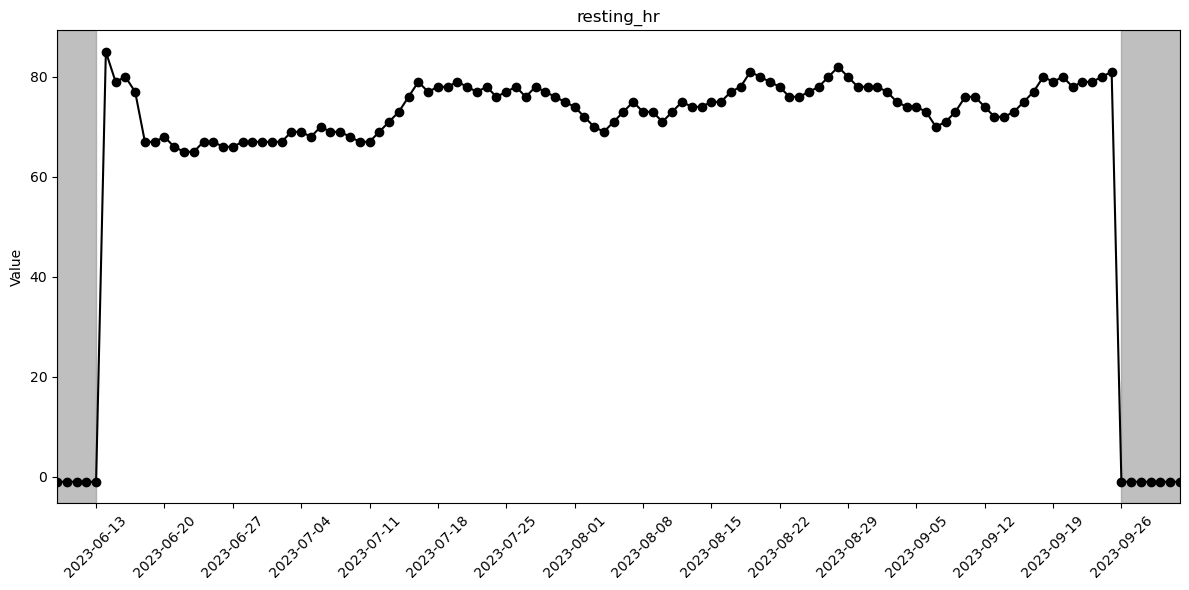

In [210]:
# 두번째 페이지
def page_about():
    # Add content for the about page
    with db.cursor() as cursor:
        cursor.execute("SELECT study_ID FROM device_info_temp")
        device_info_options = [row[0] for row in cursor.fetchall()]

    device_info = "scmfb_01_001"
    table_name = f"{device_info}"
    print("Here is table_name: ", table_name)
    all_name = get_table_names(table_name)

    uid_table_name = "smcfb_01_001_휴식기심박수"
    # st.write(smcfb_info)
    smc_info = get_table_data(uid_table_name)

    #여기서 plot 을 표시해야함
    if uid_table_name in uid_table_name + "_휴식기심박수":
        df, min_date, max_date = extract_range_data(smc_info, device_info, uid_table_name)
        plot_resting(df, min_date, max_date)

    elif uid_table_name in uid_table_name + "_활동량":
        # print(smc_info['user_id'])
        df, min_date, max_date = extract_range_data(smc_info, device_info, uid_table_name)
        plot_activity(df, min_date, max_date)

    # elif uid_table_name in uid_table_name + "_AZM분별활동":
    #     extract_range_data(smcfb_info, device_info)
    # elif uid_table_name in uid_table_name + "_분별심박수":
    # elif uid_table_name in uid_table_name + "_수면상세":
    # elif uid_table_name in uid_table_name + "_수면요약":
    # elif uid_table_name in uid_table_name + "_활동량":


# dbeaver 에서 해당되는 데이터 테이블 가져오기
def get_table_names(table_name):
    table_names = []
    try:
        with db.cursor() as cursor:

            query = "SHOW TABLES LIKE %s"
            cursor.execute(query, (f"%{table_name}%",))
            result = cursor.fetchall()
            for row in result:
                table_names.append(row[0])

    except pymysql.Error as e:
        print(f"An error occurred: {e}")

    return table_names

# dbeaver 에서 해당하는 데이터 Columns 가져오기
def get_table_data(smcfb_info):
    data = []
    try:
        with db.cursor() as cursor:
            # Execute the query to retrieve the data from the table
            query = f"SELECT * FROM {smcfb_info}"
            data = pd.read_sql_query(query, db)
    
    except pymysql.Error as e:
        print(f"An error occurred: {e}")

    return data



# Usage example
def main():
    page_about()

if __name__ == '__main__':
    main()

In [279]:
# 날짜별로 파악 fitbit_auto.py 실행
import os
from datetime import datetime, timedelta
import re
import requests

def get_existing_data_dates(user_id):
    
    table_name = f"{user_id}"
    all_name = get_table_names(table_name)

    uid_table_name = user_id + "_수면요약"
    # st.write(smcfb_info)
    smc_info = get_table_data(uid_table_name)
    return smc_info['date'].tolist()

def get_missing_dates(user_id, start_date, end_date):
    existing_dates = get_existing_data_dates(user_id)

    formatted_existing_dates = [
    date if isinstance(date, str) and re.match(r'\d{4}-\d{2}-\d{2}', date) else datetime.strptime(date, '%m/%d/%Y').strftime('%Y-%m-%d') 
    for date in existing_dates if isinstance(date, str)
    ]

    # 날짜 문자열들을 datetime 객체로 변환
    date_format1 = "%m/%d/%Y %H:%M"
    date_format2 = "%Y-%m-%d %H:%M:%S.%f"

    # datetime 객체인지 확인하여 문자열이면 변환
    if isinstance(start_date, str):
        date1 = datetime.strptime(start_date, date_format1)
    else:
        date1 = start_date

    if isinstance(end_date, str):
        date2 = datetime.strptime(end_date, date_format2)
    else:
        date2 = end_date

    # 날짜 차이 계산
    date_difference = date2.date() - date1.date()
    all_dates = [date1 + timedelta(days=x) for x in range(0, date_difference.days)]

    missing_dates = [date for date in all_dates if date.strftime('%Y-%m-%d') not in formatted_existing_dates]

    return missing_dates

# 버튼 Click 하면 아래 코드가 실행:
def Activity(set_time, user_id, header):
    try:
        # 하루 활동량# 활동량
        # Step
        Activity_time_steps = requests.get(f'https://api.fitbit.com/1/user/-/activities/steps/date/'+set_time+'/1d.json', headers=header).json()
        # floors
        Activity_time_floors = requests.get(f'https://api.fitbit.com/1/user/-/activities/floors/date/'+set_time+'/1d.json', headers=header).json()
        # distance
        Activity_time_distance = requests.get(f'https://api.fitbit.com/1/user/-/activities/distance/date/'+set_time+'/1d.json', headers=header).json()
        # calories
        Activity_time_calories = requests.get(f'https://api.fitbit.com/1/user/-/activities/calories/date/'+set_time+'/1d.json', headers=header).json()
        # print("pass active")
        print("call data")
    except:
        Activity_time_steps = -1
        Activity_time_floors = -1
        Activity_time_distance = -1
        Activity_time_calories = -1
        print("Activity data is missing on " + set_time)
        
    # 하루 기준으로 code generated
    dateTime = Activity_time_steps['activities-steps'][0]['dateTime']
    distance = Activity_time_distance['activities-distance'][0]['value']
    steps = Activity_time_steps['activities-steps'][0]['value']
    floors = Activity_time_floors['activities-floors'][0]['value']
    calories = Activity_time_calories['activities-calories'][0]['value']
    
    # INSERT 쿼리 작성
    query = "INSERT INTO " + user_id + "_활동량 " + "(user_id, date, distance, steps, calories, floors) VALUES (%s, %s, %s, %s, %s, %s)"

    # 데이터베이스에 데이터 삽입
    with db.cursor() as cursor:
        cursor.execute(query, (user_id, dateTime, distance, steps, calories, floors))
    print("insert db")
    db.commit()

def rest_HR(set_time, user_id, header):
    # 휴식기 심박수
    try:
        heart_rate_request = requests.get(f'https://api.fitbit.com/1/user/-/activities/heart/date/'+set_time+'/'+set_time+'.json',
                                            headers=header).json()
    except:
        print("would be 429 Error occur")

    try:
        for i in heart_rate_request['activities-heart']:
            try:
                rh_date = i['dateTime']
                rh = i['value']['restingHeartRate']
            except:
                print("resting heart rate is not detected")
                rh = -1
            
            # INSERT 쿼리 작성
            query = "INSERT INTO " + user_id + "_휴식기심박수" + "(user_id, date, resting_hr) VALUES (%s, %s, %s)"

            # 데이터베이스에 데이터 삽입
            with db.cursor() as cursor:
                cursor.execute(query, (user_id, rh_date, rh))
            db.commit()
    except:
        print("would be Error when you request too much times api in short-times")

def sleep_summary(set_time, user_id, header):
    # 수면 요약
    sleep_data = requests.get(f'https://api.fitbit.com/1.2/user/-/sleep/date/'+set_time+'.json', headers=header).json()

    try:
        sleep_dateTime = sleep_data['sleep'][0]['dateOfSleep']
    except:
        print("None Sleep Data, "+set_time+"this day")
        sleep_dateTime = set_time
    try:
        stages_deep = sleep_data['summary']['stages']['deep']
    except:
        stages_deep = -1
    try:
        stages_light = sleep_data['summary']['stages']['light']
    except:
        stages_light = -1
    try:
        stages_rem = sleep_data['summary']['stages']['rem']
    except:
        stages_rem = -1
    try:
        stages_wake = sleep_data['summary']['stages']['wake']
    except:
        stages_wake = -1
    
    #v1
    try:
        efficiency = sleep_data['sleep'][0]['efficiency']
    except:
        efficiency = -1

    try:
        cnt_deep = sleep_data['sleep'][0]['levels']['summary']['deep']['count']
    except:
        cnt_deep = -1
    
    try:
        cnt_light = sleep_data['sleep'][0]['levels']['summary']['light']['count']
    except:
        cnt_light = -1

    try:
        cnt_rem = sleep_data['sleep'][0]['levels']['summary']['rem']['count']
    except:
        cnt_rem = -1
    
    try:
        cnt_wake = sleep_data['sleep'][0]['levels']['summary']['wake']['count']
    except:
        cnt_wake = -1

    totalMinutesAsleep = sleep_data['summary']['totalMinutesAsleep']
    totalSleepRecords = sleep_data['summary']['totalSleepRecords']
    totalTimeInBed = sleep_data['summary']['totalTimeInBed']

    try:
        a = []
        for i in sleep_data['sleep']:
            a.append(i['efficiency'])

        sleep_efficiency = np.floor(np.mean(a))
    except:
        print("efficiency was not found")

    # INSERT 쿼리 작성
    query = "INSERT INTO " + user_id + "_수면요약 (user_id, date, totalMinutesAsleep, totalSleepRecords, totalTimeInBed, stages_deep, stages_light, stages_rem, stages_wake, efficiency, cnt_deep, cnt_light, cnt_rem, cnt_wake) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)"

    # 데이터베이스에 데이터 삽입
    with db.cursor() as cursor:
        cursor.execute(query, (user_id, sleep_dateTime, totalMinutesAsleep, totalSleepRecords, totalTimeInBed, stages_deep, stages_light, stages_rem, stages_wake, efficiency, cnt_deep, cnt_light, cnt_rem, cnt_wake))
    db.commit()

def sleep_detail(set_time, user_id, header):
    # 수면 상세
    sleep_detail = requests.get(f'https://api.fitbit.com/1.2/user/-/sleep/date/' + set_time + '.json', headers=header).json()

    # INSERT 쿼리 작성
    query = "INSERT INTO " + user_id + "_수면상세 (user_id, date, time_stamp, sleep_stage, sleep_duration) VALUES (%s, %s, %s, %s, %s)"

    if sleep_detail['sleep'] == []:
        print("User Warning Code: Sleep data is empty , sent message to wear device")
        with db.cursor() as cursor:
            cursor.execute(query, (user_id, set_time, '-1', '-1', '-1'))
        db.commit()
    else:
        for i in sleep_detail['sleep']:
            for j in i['levels']['data']:
                # sleep date time stamp
                sleep_dateTime = j['dateTime']
                sdTime = sleep_dateTime.split('T')

                sleep_stage = j['level']
                sleep_duration = j['seconds']

                with db.cursor() as cursor:
                    cursor.execute(query, (user_id, i['dateOfSleep'], sdTime[1], sleep_stage, sleep_duration))
                db.commit()

def AZM(set_time, user_id, header):
    # AZM (분별 활동 interval)
    activity_zone_minute = requests.get(f'https://api.fitbit.com/1/user/-/activities/active-zone-minutes/date/'+set_time+'/1d.json', headers=header).json()

    # INSERT 쿼리 작성
    query = "INSERT INTO " + user_id + "_AZM분별활동 (user_id, date, activeZoneMinutes, fatBurnActiveZoneMinutes, cardioActiveZoneMinutes) VALUES (%s, %s, %s, %s, %s)"

    if activity_zone_minute["activities-active-zone-minutes"] == []:
        print(f"AZM is not detected at {set_time}")
        with db.cursor() as cursor:
            cursor.execute(query, (user_id, set_time, 0, 0, 0))
        db.commit()
    else:
        for i in activity_zone_minute['activities-active-zone-minutes']:
            
            try:
                activeZoneMinutes = i['value']['activeZoneMinutes']
            except:
                activeZoneMinutes = 0
            try:
                fatBurnActiveZoneMinutes = i['value']['fatBurnActiveZoneMinutes']
            except:
                fatBurnActiveZoneMinutes = 0
            try:
                cardioActiveZoneMinutes = i['value']['cardioActiveZoneMinutes']
            except:
                cardioActiveZoneMinutes = 0

            with db.cursor() as cursor:
                cursor.execute(query, (user_id, i['dateTime'], activeZoneMinutes, fatBurnActiveZoneMinutes, cardioActiveZoneMinutes))
            db.commit()

def HRV_min(set_time, user_id, header):
    # 분별 HRV
    HRV_min = requests.get(f'https://api.fitbit.com/1/user/-/hrv/date/'+set_time+'/all.json', headers=header).json()

    # INSERT 쿼리 작성
    query = "INSERT INTO " + user_id + "_분별HRV (user_id, date, time, rmssd, coverage, hf, lf) VALUES (%s, %s, %s, %s, %s, %s, %s)"

    try:
        for i in range(len(HRV_min['hrv'][0]['minutes'][0]['minute'])):
            try:
                time_interval = HRV_min['hrv'][0]['minutes'][i]['minute'].split('T')

            except:
                print("Error")

            with db.cursor() as cursor:
                cursor.execute(query, (user_id, time_interval[0], time_interval[1], HRV_min['hrv'][0]['minutes'][i]['value']['rmssd'], HRV_min['hrv'][0]['minutes'][i]['value']['coverage'], HRV_min['hrv'][0]['minutes'][i]['value']['hf'], HRV_min['hrv'][0]['minutes'][i]['value']['lf']))
            db.commit()
    except:
        none_value = -1
        with db.cursor() as cursor:
            cursor.execute(query, (user_id, set_time, none_value, none_value, none_value, none_value))
        db.commit()
        print("Patient does not have Deep sleep level")

def min_by_heartrate(set_time, user_id, header):
    Heart_rate_min = requests.get(f'https://api.fitbit.com/1/user/-/activities/heart/date/'+set_time+'/1d.json', headers=header).json()

    # INSERT 쿼리 작성
    query = "INSERT INTO " + user_id + "_분별심박수 (user_id, date, time_min, value) VALUES (%s, %s, %s, %s)"

    # By date
    if Heart_rate_min['activities-heart-intraday']['dataset'] == []:
        print("Except Code: Heart rate value in minute are empty")
        with db.cursor() as cursor:
            cursor.execute(query, (user_id, Heart_rate_min['activities-heart'][0]['dateTime'], '-1', '-1'))
        db.commit()
    else:
        for i in Heart_rate_min['activities-heart-intraday']['dataset']: #by daily 
            with db.cursor() as cursor:
                cursor.execute(query, (user_id, Heart_rate_min['activities-heart'][0]['dateTime'], i['time'], i['value']))
            db.commit()

def get_data_for_user(user_id, missing_dates, header):
    call_count = 0

    for current_date in missing_dates:
        if call_count >= 14:
            return False
        try:
            time_set = current_date.strftime('%Y-%m-%d')
            Activity(time_set, user_id, header)
            rest_HR(time_set, user_id, header)
            sleep_summary(time_set, user_id, header)
            sleep_detail(time_set, user_id, header)
            AZM(time_set, user_id, header)
            HRV_min(time_set, user_id, header)
            # min_by_heartrate(time_set, user_id, header)

        except Exception as e:
            error_message = str(e)
            with open("error_log.txt", "a") as file:  # 'a'는 append 모드를 의미합니다.
                file.write(error_message + "\n")
                print("eception involved")
            

            call_count += 1

    return True

# Add content for the about page
with db.cursor() as cursor:
    cursor.execute("SELECT * FROM device_info_temp")
    device_info_options = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # 컬럼 이름 가져오기
    df = pd.DataFrame(device_info_options, columns=columns)




print(pd.isnull(df['ACCESS_TOKEN'][0]))
results = []

for i in range(len(df)):
    if not pd.isnull(df['ACCESS_TOKEN'][i]):
        if not pd.isnull(df['START'][i]):
            user_id = df.study_ID[i]
            if user_id == "smcfb_01_001":
                access_token = df.ACCESS_TOKEN[i]

                start_date = df['START'][i]
                end_date = datetime.now()

                missing_dates = get_missing_dates(user_id, start_date, end_date)
                formatted_dates = [date.strftime("%m/%d/%Y") for date in missing_dates]
                print(formatted_dates)
                # Data api call From here
                header = {'Authorization': 'Bearer {}'.format(access_token)}
                response = requests.get("https://api.fitbit.com/1/user/-/profile.json", headers=header).json()
                print("start call data")

                if not get_data_for_user(user_id, missing_dates, header):
                    print(f"Reached API call limit for user: {user_id}. Skipping to the next user.")

False
['10/03/2023', '10/04/2023', '10/05/2023', '10/06/2023', '10/07/2023']


C:\Users\suhho\AppData\Local\Temp\ipykernel_22748\1438484892.py:59: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql_query(query, db)


start call data
Except Code: Heart rate value in minute are empty
Except Code: Heart rate value in minute are empty
Except Code: Heart rate value in minute are empty
Except Code: Heart rate value in minute are empty
Except Code: Heart rate value in minute are empty
